<a href="https://colab.research.google.com/github/aalexakos/thesis-smart-grids/blob/main/random_forest_simpler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import time
import numpy as np
from ast import literal_eval
from sklearn.metrics import *
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive/')

data_location = '/content/drive/MyDrive/alexakos-thesis/'

csv=(f'{data_location}datasets/monthly_data.csv') 
df=pd.read_csv(csv)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['hour']=df['datetime'].dt.hour.reset_index(drop=True)
df['weatherCode'] = df['weatherCode'].astype(int)
df.drop(df[df.hour == 18].index, inplace=True)
# df.drop(df[df.hour == 17].index, inplace=True)
# df.drop(df[df.hour == 16].index, inplace=True)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data=df.dropna().reset_index(drop=True).drop(columns=['pySolar','p_solar_horizontal','horizontal_avg','modular_avg','sensor_avg','datetime','openweather_modular','climacell_modular','openweathermap','dni','dhi'])
data

,active_power,timestamp,climacell,temp_air,windSpeed,weatherCode,altidute,hour
0,1089.745098,1.622524e+09,130.54,15.40,1.38,1101,18.692675,5
1,2091.360000,1.622527e+09,307.79,17.40,0.78,1101,30.147389,6
2,2893.392157,1.622531e+09,523.31,18.76,1.27,1100,41.766524,7
3,3492.411765,1.622534e+09,710.12,20.08,2.41,1100,53.208948,8
4,3834.920000,1.622538e+09,799.27,20.76,3.62,1100,63.792161,9
...,...,...,...,...,...,...,...,...
399,2792.366667,1.625054e+09,932.05,38.40,5.50,1000,66.622376,12
400,2335.633333,1.625058e+09,847.44,36.20,3.78,1001,56.261743,13
401,1419.206897,1.625062e+09,694.83,34.51,3.15,1000,44.871977,14
402,781.466667,1.625065e+09,556.07,33.26,2.32,1000,33.253899,15


In [ ]:
print(data.head(25).to_latex(caption="Ενδεικτικός πίνακας με δεδομένα για την εκπαίδευση του μοντελου μηχανικής μάθησης",))


\begin{table}
\centering
\caption{Ενδεικτικός πίνακας με δεδομένα για την εκπαίδευση του μοντελου μηχανικής μάθησης}
\begin{tabular}{lrrrrrrrr}
\toprule
{} &  active\_power &     timestamp &  climacell &  temp\_air &  windSpeed &  weatherCode &   altidute &  hour \\
\midrule
0  &   1089.745098 &  1.622524e+09 &     130.54 &     15.40 &       1.38 &         1101 &  18.692675 &     5 \\
1  &   2091.360000 &  1.622527e+09 &     307.79 &     17.40 &       0.78 &         1101 &  30.147389 &     6 \\
2  &   2893.392157 &  1.622531e+09 &     523.31 &     18.76 &       1.27 &         1100 &  41.766524 &     7 \\
3  &   3492.411765 &  1.622534e+09 &     710.12 &     20.08 &       2.41 &         1100 &  53.208948 &     8 \\
4  &   3834.920000 &  1.622538e+09 &     799.27 &     20.76 &       3.62 &         1100 &  63.792161 &     9 \\
5  &   3998.803922 &  1.622542e+09 &     803.31 &     21.40 &       4.38 &         1100 &  71.557286 &    10 \\
6  &   3794.840000 &  1.622545e+09 &     865.61 &   

In [ ]:
# Split the data into training and testing sets
features=data.drop(['active_power'], axis='columns')

features_with_cols = features 
# Labels are the values we want to predict
labels=np.array(data.active_power)

# Saving feature names for later use
# feature_list = list(features.columns)

# Convert to numpy array
# features = np.array(features)

In [ ]:
# # One-hot encode the data using pandas get_dummies
# one_hot = pd.get_dummies(features['weatherCode'])

# features.drop('weatherCode', axis=1, inplace =True)

# features = features.join(one_hot)

# Saving feature names for later use
feature_list = list(features.columns)

features = np.array(features)

# Display the first 5 rows of the last 12 columns
features

array([[1.62252360e+09, 1.30540000e+02, 1.54000000e+01, ...,
        1.10100000e+03, 1.86926754e+01, 5.00000000e+00],
       [1.62252720e+09, 3.07790000e+02, 1.74000000e+01, ...,
        1.10100000e+03, 3.01473890e+01, 6.00000000e+00],
       [1.62253080e+09, 5.23310000e+02, 1.87600000e+01, ...,
        1.10000000e+03, 4.17665239e+01, 7.00000000e+00],
       ...,
       [1.62506160e+09, 6.94830000e+02, 3.45100000e+01, ...,
        1.00000000e+03, 4.48719766e+01, 1.40000000e+01],
       [1.62506520e+09, 5.56070000e+02, 3.32600000e+01, ...,
        1.00000000e+03, 3.32538988e+01, 1.50000000e+01],
       [1.62506880e+09, 3.47420000e+02, 3.23500000e+01, ...,
        1.00100000e+03, 2.17679741e+01, 1.60000000e+01]])

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 30)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (282, 7)
Training Labels Shape: (282,)
Testing Features Shape: (122, 7)
Testing Labels Shape: (122,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, random_state=40)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=40, verbose=0, warm_start=False)

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 215.87 degrees.


In [ ]:
# print("0s test labels: ",test_labels[test_labels==0].count())
# print("0s errors: ",errors[errors==0].count())


In [ ]:
rf.score(test_features, test_labels)

0.924424034573171

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: altidute             Importance: 0.77
Variable: climacell            Importance: 0.07
Variable: hour                 Importance: 0.07
Variable: timestamp            Importance: 0.02
Variable: temp_air             Importance: 0.02
Variable: windSpeed            Importance: 0.02
Variable: weatherCode          Importance: 0.02


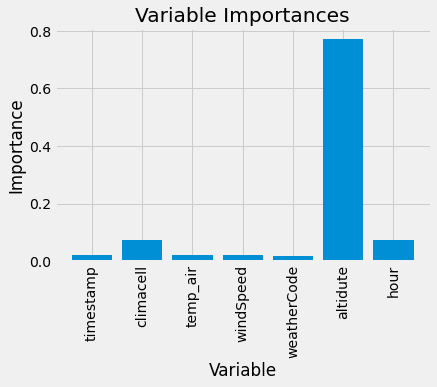

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
df1=pd.DataFrame({'Actual':test_labels, 'Predicted':predictions})
df1.sort_index(inplace=True)
df1['datetime']=df.datetime
df1.sort_index()
df1

,Actual,Predicted,datetime
0,3260.333333,3187.094059,2021-06-01 03:00:00
1,74.733333,56.432087,2021-06-01 04:00:00
2,3118.000000,2985.848358,2021-06-01 05:00:00
3,314.900000,312.337188,2021-06-01 06:00:00
4,3705.896552,3621.611040,2021-06-01 07:00:00
...,...,...,...
117,1796.066667,1735.881633,2021-06-06 00:00:00
118,3046.420000,2471.598781,2021-06-06 01:00:00
119,3321.718750,3380.050113,2021-06-06 02:00:00
120,3339.566667,3051.702370,2021-06-06 03:00:00


In [ ]:
print(df1.datetime.count())
print(df1.Predicted.count())

117
122


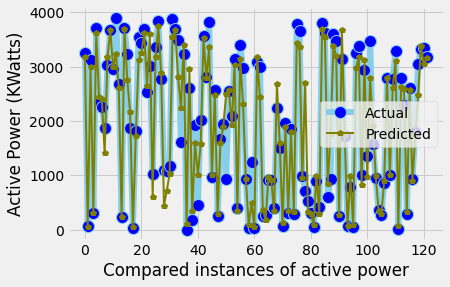

In [ ]:
plt.plot('Actual', data=df1, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=6)
plt.plot('Predicted', data=df1, marker='p',markerfacecolor='olive', color='olive', linewidth=2)

# plt.rcParams['figure.figsize'] = [30, 10]

plt.xlabel("Compared instances of active power")
plt.ylabel("Active Power (KWatts)")

plt.legend()

plt.show()



In [ ]:
test_features_df=pd.DataFrame(test_features, columns=features_with_cols.columns)
test_features_df['predicted']=df1['Predicted']

test_features_df['datetime']=(pd.to_datetime(test_features_df['timestamp'],unit='s'))
# test_features_df['datetime'] = test_features_df['datetime'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,1*(dt.minute // 1)))
test_features_df['timestamp'] = test_features_df['datetime'].astype('int64')

test_features_df['timestamp']=test_features_df['timestamp'].floordiv(1000000000)

test_features_df['hour']=test_features_df.datetime.dt.hour

test_features_df.hour=test_features_df.hour.astype(int)
test_features_df.weatherCode=test_features_df.weatherCode.astype(int)



In [ ]:
test_features_df

,timestamp,climacell,temp_air,windSpeed,weatherCode,altidute,hour,predicted,datetime
0,1624089600,652.91,26.29,2.08,1102,53.317024,8,3187.094059,2021-06-19 08:00:00
1,1623603600,128.20,22.56,2.07,1001,10.120813,17,56.432087,2021-06-13 17:00:00
2,1624359600,866.68,33.88,2.80,1100,73.643243,11,2985.848358,2021-06-22 11:00:00
3,1622908800,336.78,23.08,2.41,1101,20.498933,16,312.337188,2021-06-05 16:00:00
4,1623834000,839.86,25.46,3.10,1000,64.196235,9,3621.611040,2021-06-16 09:00:00
...,...,...,...,...,...,...,...,...,...
117,1624946400,318.03,27.11,0.30,1000,29.675736,6,1735.881633,2021-06-29 06:00:00
118,1622552400,718.67,23.37,6.17,1102,54.576421,13,2471.598781,2021-06-01 13:00:00
119,1622894400,876.92,27.02,4.58,1001,65.418160,12,3380.050113,2021-06-05 12:00:00
120,1625050800,948.74,39.27,3.79,1000,73.458266,11,3051.702370,2021-06-30 11:00:00


In [ ]:
test_features_df.to_csv('rf_predicted.csv', index=False)

!cp rf_predicted.csv "drive/My Drive/alexakos-thesis/datasets"


In [ ]:
import pickle

filename = 'drive/My Drive/alexakos-thesis/datasets/random_forest.sav'
pickle.dump(rf, open(filename, 'wb'))

!cp random_forest.sav "drive/My Drive/alexakos-thesis/datasets"


cp: cannot stat 'random_forest.sav': No such file or directory
